<a href="https://colab.research.google.com/github/MuditIsOP/BBD/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Display basic information about the dataset
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("Target names:", iris.target_names)

Features (X) shape: (150, 4)
Target (y) shape: (150,)
Target names: ['setosa' 'versicolor' 'virginica']


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [4]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

In [5]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier: {accuracy:.2f}\n")

# Find correct and wrong predictions
correct_predictions_indices = np.where(y_pred == y_test)[0]
wrong_predictions_indices = np.where(y_pred != y_test)[0]

print("--- Correct Predictions ---")
for i in correct_predictions_indices:
    print(f"Sample {i+1}: Predicted = {iris.target_names[y_pred[i]]}, Actual = {iris.target_names[y_test[i]]}")

print("\n--- Wrong Predictions ---")
if len(wrong_predictions_indices) == 0:
    print("No wrong predictions!")
else:
    for i in wrong_predictions_indices:
        print(f"Sample {i+1}: Predicted = {iris.target_names[y_pred[i]]}, Actual = {iris.target_names[y_test[i]]}")

Accuracy of KNN classifier: 1.00

--- Correct Predictions ---
Sample 1: Predicted = versicolor, Actual = versicolor
Sample 2: Predicted = setosa, Actual = setosa
Sample 3: Predicted = virginica, Actual = virginica
Sample 4: Predicted = versicolor, Actual = versicolor
Sample 5: Predicted = versicolor, Actual = versicolor
Sample 6: Predicted = setosa, Actual = setosa
Sample 7: Predicted = versicolor, Actual = versicolor
Sample 8: Predicted = virginica, Actual = virginica
Sample 9: Predicted = versicolor, Actual = versicolor
Sample 10: Predicted = versicolor, Actual = versicolor
Sample 11: Predicted = virginica, Actual = virginica
Sample 12: Predicted = setosa, Actual = setosa
Sample 13: Predicted = setosa, Actual = setosa
Sample 14: Predicted = setosa, Actual = setosa
Sample 15: Predicted = setosa, Actual = setosa
Sample 16: Predicted = versicolor, Actual = versicolor
Sample 17: Predicted = virginica, Actual = virginica
Sample 18: Predicted = versicolor, Actual = versicolor
Sample 19: Pr

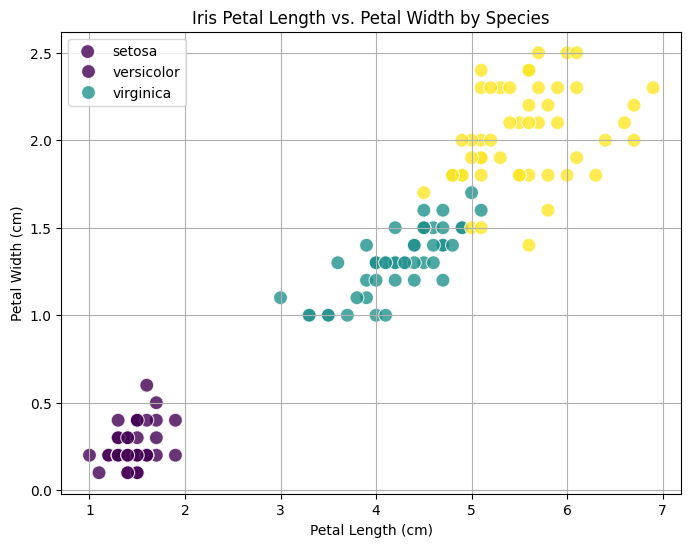

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=y, palette='viridis', s=100, alpha=0.8)
plt.title('Iris Petal Length vs. Petal Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(labels=iris.target_names)
plt.grid(True)
plt.show()

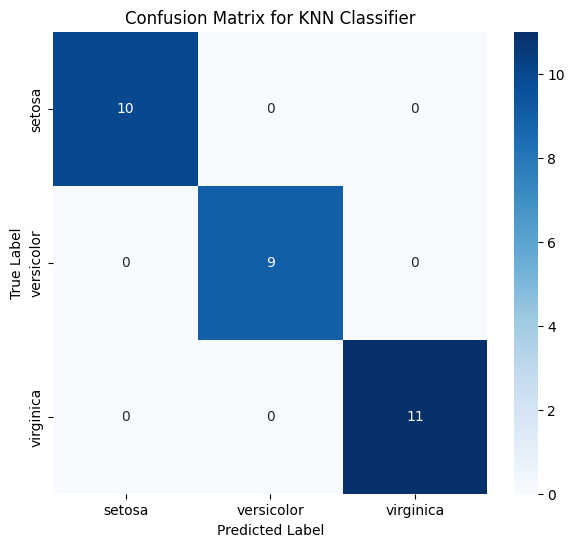

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()